In [2]:
import pandas as pd
import io

In [4]:
from google.colab import files
uploaded=files.upload()
data=pd.read_csv(io.BytesIO(uploaded['loan_data.csv']))
data.head()

Saving loan_data.csv to loan_data.csv


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.shape

(614, 13)

In [ ]:
# checking missing values in the data

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# data types of the variables

In [7]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
# Filling the missing values :

In [ ]:
# 1) Categorical Data with "MODE"

In [8]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

data['Married'].fillna(data['Married'].mode()[0], inplace=True)

data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)

data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [ ]:
# 2) Continuous Data with "MEAN"

In [9]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

In [10]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# Converting categories to numbers:

In [11]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Married'] = data['Married'].map({'No': 0, 'Yes': 1})
data['Dependents'] = data['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
data['Self_Employed'] = data['Self_Employed'].map({'No': 0, 'Yes': 1})
data['Property_Area'] = data['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
data['Loan_Status'] = data['Loan_Status'].map({'N': 0, 'Y': 1})

In [12]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [ ]:
# Bringing all the variables in range 0 to 1(scaling):

In [13]:
data['Dependents']=(data['Dependents']-data['Dependents'].min())/(data['Dependents'].max()-data['Dependents'].min())

In [ ]:
# applying for loop to bring all the variables in range 0 to 1:

In [14]:
for i in data.columns[1:]:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

In [15]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [16]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
data = data.drop('Loan_ID', axis=1)

In [18]:
data.shape

(614, 12)

In [ ]:
# separating the independent and dependent variables

In [19]:
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

In [20]:
X.shape, y.shape

((614, 11), (614,))

In [ ]:
# Creating training and validation set:

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=data['Loan_Status'],random_state=10,test_size=0.2)

In [22]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

In [ ]:
# Defining the architecture of the model:

In [24]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import InputLayer, Dense

In [25]:
# number of features in the data
X_train.shape[1]

11

In [26]:
# defining input neurons
input_neurons = X_train.shape[1]

In [27]:
# define number of output neurons(since loan prediction is a binary classification problem, we will have single neuron in the output layer )
output_neurons = 1

In [28]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [29]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model (defining loss function, optimizer):

In [ ]:
# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam

In [31]:
model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy'])

In [ ]:
# training the model:

In [32]:
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
16/16 [==============================] - 1s 17ms/step - loss: 1.4369 - accuracy: 0.3136 - val_loss: 1.3111 - val_accuracy: 0.3089
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 1.1664 - accuracy: 0.3136 - val_loss: 1.0848 - val_accuracy: 0.3089
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.9864 - accuracy: 0.3136 - val_loss: 0.9256 - val_accuracy: 0.3089
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8606 - accuracy: 0.3157 - val_loss: 0.8143 - val_accuracy: 0.2927
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7725 - accuracy: 0.2831 - val_loss: 0.7321 - val_accuracy: 0.3496
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7097 - accuracy: 0.4603 - val_loss: 0.6749 - val_accuracy: 0.6423
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6626 - accuracy: 0.6578 - val_loss: 0.6354 - val_accuracy: 0.6911
Epoch 8/50
16/16 [=

In [34]:
# getting predictions for the validation set:
prediction = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [38]:
# calculating the accuracy on validation set
accuracy_score(y_test, prediction.round())

0.8130081300813008

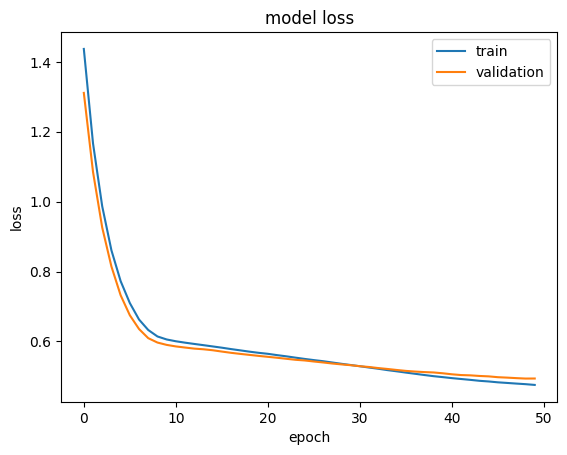

In [43]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

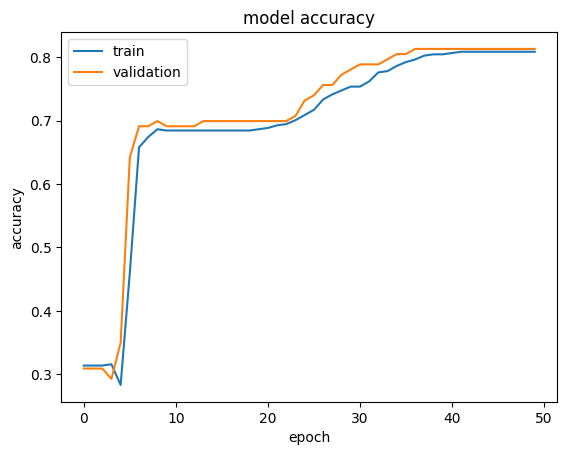

In [42]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()